<a href="https://colab.research.google.com/github/UKJaagadhep/Data-science-and-machine-learning/blob/main/Binary%20Classification%20with%20PyTorch/Binary_classification_with_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

In [18]:
#Checking for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [31]:
data = load_breast_cancer()
x = data.data
y = data.target

In [32]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [34]:
x.shape

(569, 30)

In [35]:
y.shape

(569,)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [37]:
x_train.shape

(455, 30)

In [38]:
y_train.shape

(455,)

In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
class Hyperparameters():
  def __init__(self, ):
    self.number_of_epochs = 50
    self.batch_size = 8
    self.learning_rate = 0.01
    self.shuffle = True

In [41]:
class TrainData(Dataset):
  def __init__(self, x_train, y_train):
    self.x_train = torch.tensor(x_train, dtype = torch.float32)
    self.y_train = torch.tensor(y_train, dtype = torch.float32)

  def __getitem__(self, index):
    return self.x_train[index], self.y_train[index]

  def __len__(self):
    return len(self.x_train)

In [42]:
class TestData(Dataset):
  def __init__(self, x_test):
    self.x_test = torch.tensor(x_test, dtype = torch.float32)

  def __getitem__(self, index):
    return self.x_test[index]

  def __len__(self):
    return len(self.x_test)

In [43]:
train_data = TrainData(x_train, y_train)
test_data = TestData(x_test)

In [44]:
hyperparameters = Hyperparameters()
train_loader = DataLoader(dataset = train_data, batch_size = hyperparameters.batch_size, shuffle = hyperparameters.shuffle)
test_loader = DataLoader(dataset = test_data, batch_size = 1)

In [45]:
class BreastCancerClassifier(nn.Module): #defining model using Module in torch.nn
  def __init__(self, input_shape):
    super(BreastCancerClassifier, self).__init__()
    self.fc1 = nn.Linear(input_shape, 64)
    self.fc2 = nn.Linear(64, 128)
    self.fc3 = nn.Linear(128, 1)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [46]:
model = BreastCancerClassifier(input_shape = x_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr = hyperparameters.learning_rate)
criterion = nn.BCELoss()
model.to(device) #moving the model to device (CPU or GPU)

BreastCancerClassifier(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)

In [47]:
def binary_accuracy(y_pred, y):
  results = torch.round(y_pred)
  correct_results = (results == y).sum().float()
  acc = correct_results / y.shape[0]
  acc = torch.round(acc * 100, decimals = 2)
  return acc

In [48]:
losses = []
accuracies = []
model.train() #putting model in train mode
for i in range(1, hyperparameters.number_of_epochs + 1):
  epoch_loss = 0
  epoch_accuracy = 0

  for data in train_loader: #data here is a batch
    x_train, y_train = data
    x_train, y_train = x_train.to(device), y_train.to(device)

    optimizer.zero_grad() #zeroing the gradients so they don't accumulate over the next batch

    y_pred = model(x_train)

    loss = criterion(y_pred, y_train.reshape(-1, 1))
    acc = binary_accuracy(y_pred, y_train.reshape(-1, 1))

    loss.backward() #calculating gradients
    optimizer.step() #updating weights

    epoch_loss += loss.item()
    epoch_accuracy += acc.item()

  print(f"Epoch {i + 0:03} : | Loss : {epoch_loss / len(train_loader) : .5f} | Accuracy : {epoch_accuracy / len(train_loader) : .3f}")
  losses.append(epoch_loss / len(train_loader))
  accuracies.append(epoch_accuracy / len(train_loader))

Epoch 001 : | Loss :  0.19819 | Accuracy :  94.267
Epoch 002 : | Loss :  0.05117 | Accuracy :  99.123
Epoch 003 : | Loss :  0.06983 | Accuracy :  98.246
Epoch 004 : | Loss :  0.06500 | Accuracy :  98.465
Epoch 005 : | Loss :  0.03889 | Accuracy :  99.342
Epoch 006 : | Loss :  0.02424 | Accuracy :  98.904
Epoch 007 : | Loss :  0.04698 | Accuracy :  98.904
Epoch 008 : | Loss :  0.02750 | Accuracy :  98.904
Epoch 009 : | Loss :  0.03608 | Accuracy :  98.684
Epoch 010 : | Loss :  0.07193 | Accuracy :  98.465
Epoch 011 : | Loss :  0.04539 | Accuracy :  98.684
Epoch 012 : | Loss :  0.03079 | Accuracy :  99.123
Epoch 013 : | Loss :  0.01397 | Accuracy :  99.561
Epoch 014 : | Loss :  0.01780 | Accuracy :  99.342
Epoch 015 : | Loss :  0.01343 | Accuracy :  99.561
Epoch 016 : | Loss :  0.02048 | Accuracy :  99.342
Epoch 017 : | Loss :  0.00467 | Accuracy :  100.000
Epoch 018 : | Loss :  0.00113 | Accuracy :  100.000
Epoch 019 : | Loss :  0.00076 | Accuracy :  100.000
Epoch 020 : | Loss :  0.0003

Text(0, 0.5, 'Loss')

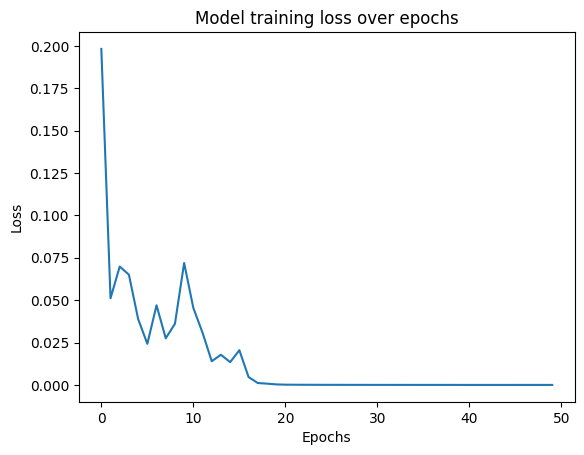

In [49]:
plt.plot(losses)
plt.title("Model training loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

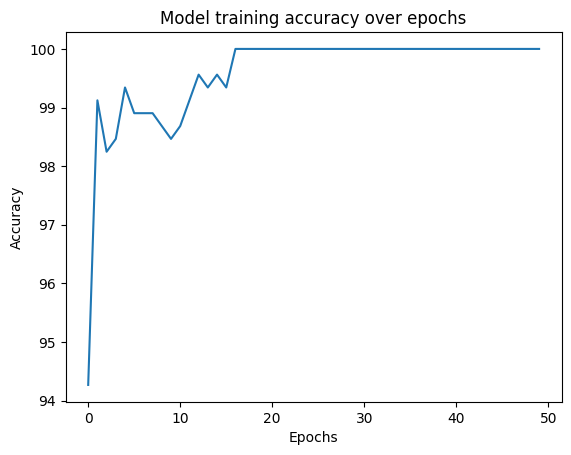

In [50]:
plt.plot(accuracies)
plt.title("Model training accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

## **Testing**

In [51]:
y_test_pred = []
model.eval() #putting model in evaluation mode
with torch.no_grad(): #no gradient calculation required as we are not training
  for x_test in test_loader:
    x_test = x_test.to(device)

    y_test_probs = model(x_test)
    y_pred = torch.round(y_test_probs)

    y_test_pred.append(y_pred.cpu().numpy()) #move rounded predictions to cpu and then make them as numpy array

y_test_pred = [a.squeeze().tolist() for a in y_test_pred] #reshaping

In [52]:
y_test_pred

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0]

In [53]:
confusion_matrix(y_test, y_test_pred)

array([[41,  1],
       [ 4, 68]])

In [55]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

